<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/final_GROUP12__DTI_ASSIGNMENT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')
nltk.download('gutenberg')

def create_partitions(text, book_name, author):
    partitions = []
    words = nltk.word_tokenize(text)
    for i in range(0, len(words), 150):
        partitions.append((words[i:i+150], book_name, author))
    return partitions

#The books selected below are from the gutenberg module and are of different genre
book_names=['melville-moby_dick.txt','edgeworth-parents.txt','chesterton-thursday.txt','austen-emma.txt','shakespeare-hamlet.txt']

def random_sentences_with_book_name():
  result=pd.DataFrame(columns=['Text', 'Book Name','Author'])
  for i in book_names:
    # Splitting the book names to remove their 'txt' extension
    label_name=i.split('.')[0]

    # Getting the book names from Gutenberg and reading them
    book = gutenberg.raw(i)

    #Getting the book names and their respective authors
    lines = book.splitlines()

    #The first line consists information about the above comment
    line1=lines[0]
    
    #Removing the year from the line
    pattern = r'\D+'

    digits_removed = re.findall(pattern, line1)

    #Getting the author name
    author = re.search(r'\sby\s([\w\s\.]+)[\s\d{4}]+', digits_removed[0]).group(1)

    #Getting the book name
    book_name = re.search(r'\[([\w\s\']+)[\,]?\sby', line1).group(1)

    # Create partitions of 150 words each
    partitions = create_partitions(book, book_name, author)

    # Create 200 random samples of the partitions
    samples = random.sample(partitions, 200)

    # Using regular expressions to clean the data
    for i in range(len(samples)):
        samples[i] = (re.sub(r'[^\w\s]','', ' '.join(samples[i][0])), samples[i][1], samples[i][2])

    # Serialize the data using Pandas
    df = pd.DataFrame(samples, columns=['Text', 'Book Name','Author'])

    #Appending the random sentences of a book to the final dataframe 
    result=pd.concat([result,df])
  result.to_csv('book_partitions.csv', index=False)

  print("Data saved to book_partitions.csv.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [2]:
random_sentences_with_book_name()

Data saved to book_partitions.csv.


In [3]:
data=pd.read_csv('book_partitions.csv')

In [4]:
data['label']=0
data['label'][200:400]=1
data['label'][400:600]=2
data['label'][600:800]=3
data['label'][800:1000]=4

<ipython-input-4-f510ee5b3d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][200:400]=1
<ipython-input-4-f510ee5b3d00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][400:600]=2
<ipython-input-4-f510ee5b3d00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][600:800]=3
<ipython-input-4-f510ee5b3d00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [5]:
data

,Text,Book Name,Author,label
0,now beholding him aye and into the eye that ...,Moby Dick,Herman Melville,0
1,valleys of the Manilla isles the Spanish land...,Moby Dick,Herman Melville,0
2,thoughts They deified the crocodile of the Ni...,Moby Dick,Herman Melville,0
3,condescending concern and compassion as thoug...,Moby Dick,Herman Melville,0
4,air a certain element which being subsequentl...,Moby Dick,Herman Melville,0
...,...,...,...,...
995,I will pay the Theft Enter King Queene Polo...,The Tragedie of Hamlet,William Shakespeare,4
996,a share Ham A whole one I For thou dost know...,The Tragedie of Hamlet,William Shakespeare,4
997,Fell into a Sadnesse then into a Fast Thenc...,The Tragedie of Hamlet,William Shakespeare,4
998,Sancturize Reuenge should haue no bounds but...,The Tragedie of Hamlet,William Shakespeare,4


In [6]:
# ploting word cloud for the most frequent 20 words in each book  
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px


for label in data['label'].unique():
  books = data[data["label"]==label]["Text"]


# Creating  word cloud
  wc = wordcloud.WordCloud(background_color=None, max_words=20, 
                          max_font_size=100)
  wc = wc.generate(str(books))

# Converting  word cloud to dataframe
  words = list(wc.words_.keys())
  freq = [wc.words_[word] for word in words]
  data10 = {'words': words, 'freq': freq}
  df10 = pd.DataFrame(data10)

  # Creating  interactive word cloud
  fig = px.scatter(df10, x='words', y='freq', text='words', size='freq', color='freq')
  fig.update_layout(title='Interactive Word Cloud',
                    xaxis_title='Words',
                    yaxis_title='Frequency')
  fig.show()


 FREQUENT 50 WORDS IN BOOK  : Moby Dick



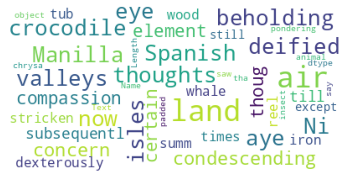


 FREQUENT 50 WORDS IN BOOK  : The Parent's Assistant



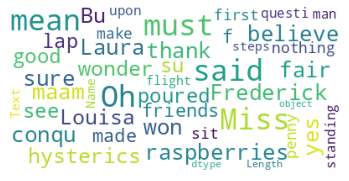


 FREQUENT 50 WORDS IN BOOK  : The Man Who Was Thursday



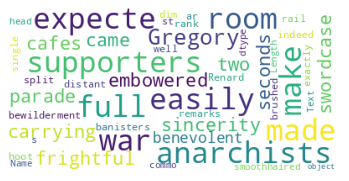


 FREQUENT 50 WORDS IN BOOK  : Emma



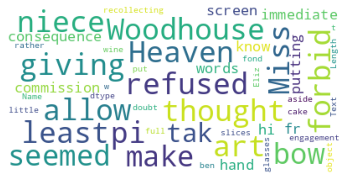


 FREQUENT 50 WORDS IN BOOK  : The Tragedie of Hamlet



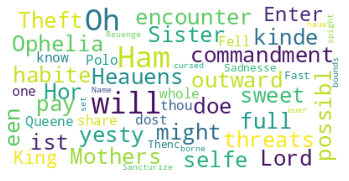

In [7]:
# plot word cloud for the most frequent 50 words in each book  
import wordcloud

for label in data['Book Name'].unique():
  books = data[data["Book Name"]==label]["Text"]

  #wordcloud 
  print(f"\n FREQUENT 50 WORDS IN BOOK  : {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

#

In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [9]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

Clustered data points for X_train

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



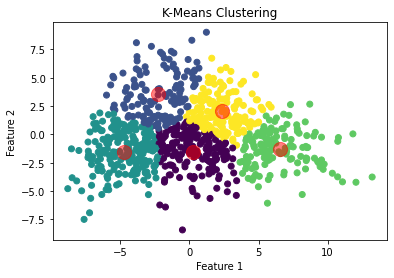

In [11]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Geting the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Ploting  the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

Unclustered Raw datapoints of data

Clustered data points for X_test

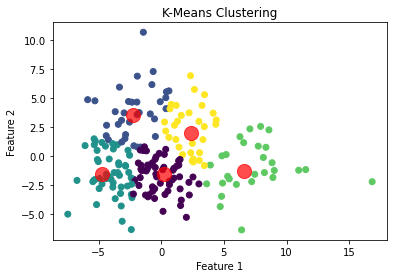

In [12]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for KMeans with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for KMeans with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for KMeans with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for KMeans with Bag of words is  0.35979173022434247
_________________________________________________________________________
kappa for KMeans with Bag of words is  -0.061683171390432445
_________________________________________________________________________
Coherence for KMeans with Bag of words is: 0.07807487677096017
_________________________________________________________________________


In [14]:
from collections import Counter
def cluster_count(pred):
  cls_count = Counter(pred)
  plt.bar(cls_count.keys(), cls_count.values())
  cluster_count(x_pca_test)

#EM (GAUSSIAN MIXTURE ) 

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

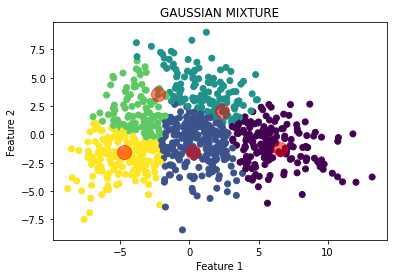

In [16]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Geting  the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Ploting  the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

====UNCLUSTERED RAW DATA====


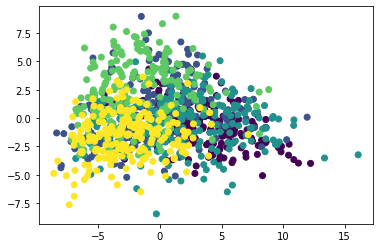

In [17]:
 print("====UNCLUSTERED RAW DATA====")
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

====TEST DATA CLUSTER====


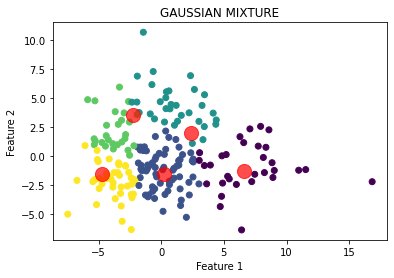

In [18]:
 print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for EM with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for EM with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for EM with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for EM with Bag of words is  0.35979110874571174
_________________________________________________________________________
kappa for EM with Bag of words is  0.14103454809574933
_________________________________________________________________________
Coherence for EM with Bag of words is: 0.08084938364444698
_________________________________________________________________________


#Heirarchial with Bag of words 


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

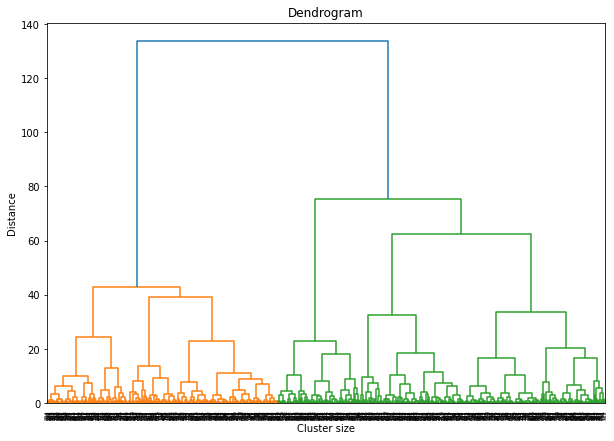

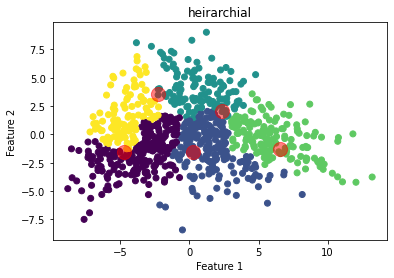

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca_train, 'ward')

# Ploting  dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters since 5 books 
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_pca_train)


labels = agg.labels_

print("==============================================================================================")


# Ploting  the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("heirarchial")
plt.show()

====TEST DATA CLUSTER====


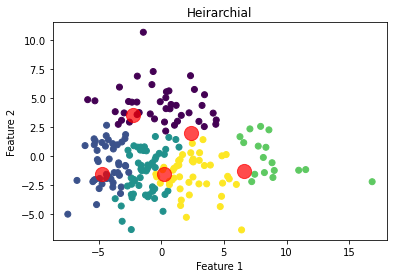

In [22]:
print("====TEST DATA CLUSTER====")
predicted_labels=agg.fit_predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heirarchial')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Bag of words is  0.29332573288747343
_________________________________________________________________________
kappa for Heirarchial with Bag of words is  -0.05157736604907348
_________________________________________________________________________
Coherence for Heirarchial with Bag of words is: 0.07109256060671376
_________________________________________________________________________


#TF-IDF k-means


In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [25]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



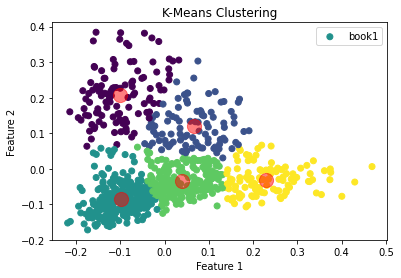

In [27]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Geting the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.legend(["book1","book2","book3","book4","book5"])
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

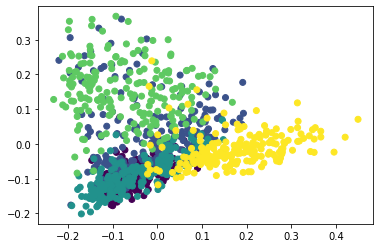

In [28]:
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

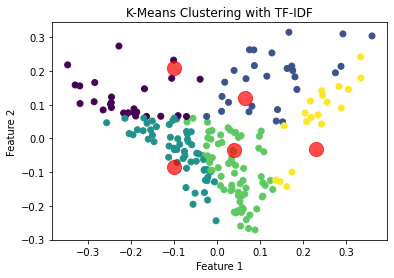

In [29]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with TF-IDF')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for KMEANS with TFIDF is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for KMEANS with TFIDF is ",kappa )
kktdf = kappa
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for KMEANS with TFIDF is:", ari)
print("_________________________________________________________________________")

Silhouette for KMEANS with TFIDF is  0.4385450070576519
_________________________________________________________________________
kappa for KMEANS with TFIDF is  -0.037041636911230524
_________________________________________________________________________
Coherence for KMEANS with TFIDF is: 0.15840235225605362
_________________________________________________________________________


#tfidf gmm


In [31]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

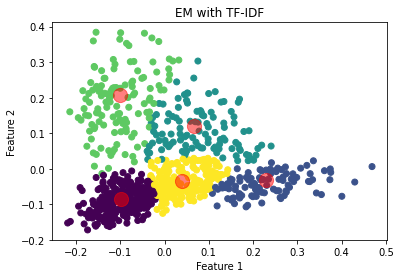

In [33]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Geting the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with TF-IDF')
plt.show()

====UNCLUSTERED RAW DATA====


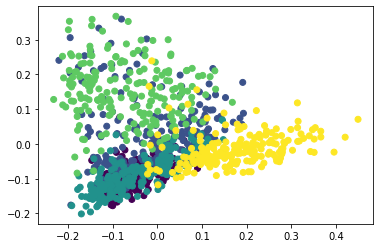

In [34]:
 print("====UNCLUSTERED RAW DATA====")
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

====TEST DATA CLUSTER====


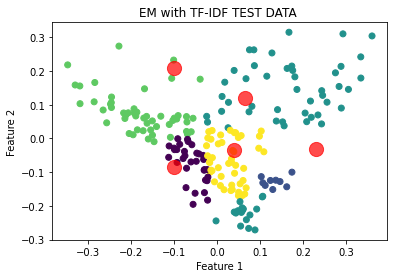

In [35]:
print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with TF-IDF TEST DATA ')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for GMM with TF-IDF is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for GMM with TF-IDF is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for GMM with TF-IDF is:", ari)
print("_________________________________________________________________________")

Silhouette for GMM with TF-IDF is  0.438543871040274
_________________________________________________________________________
kappa for GMM with TF-IDF is  -0.054296257248286794
_________________________________________________________________________
Coherence for GMM with TF-IDF is: 0.23494735085034676
_________________________________________________________________________


#TFIDF HEIRARCHIAL 


In [37]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

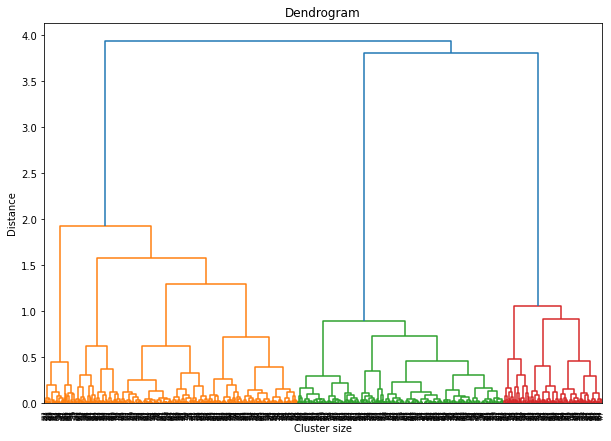

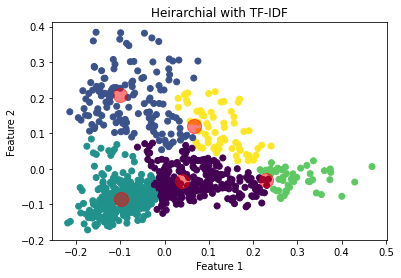

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca_train, 'ward')

# Ploting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters since 5 books dataset 
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_pca_train)


labels = agg.labels_
agg.fit_predict(X_pca_test)
print("==============================================================================================")
 


# Ploting the the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Heirarchial with TF-IDF")
plt.show()

predicted_labels = agg.fit_predict(X_pca_test)

In [40]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with TF-IDF ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with TF-IDF ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with TF-IDF:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with TF-IDF  0.4091279429622847
_________________________________________________________________________
kappa for Heirarchial with TF-IDF  0.005995092100767319
_________________________________________________________________________
Coherence for Heirarchial with TF-IDF: 0.294452753314088
_________________________________________________________________________


#WORD EMBEDDING 

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



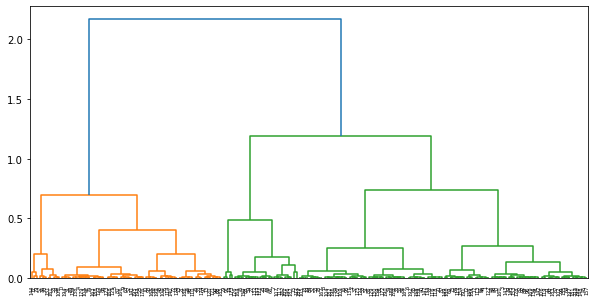

In [42]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


data = pd.read_csv("book_partitions.csv")



# Training  word2vec model
sentences = [doc.split() for doc in X_train]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Getting  document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(doc_vectors)

sentences = [doc.split() for doc in X_test]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Getting document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

X_pca_test = pca.fit_transform(doc_vectors)


# Clustering with k-means
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)
kmeans_labels = kmeans.labels_
km_predicted_labels = kmeans.predict(X_pca_test)

# Clustering with Gaussian mixture
gmm = GaussianMixture(n_components=5, random_state=0).fit(X_pca_train)
gmm_labels = gmm.predict(X_pca_train)
gmm_predicted_labels = gmm.predict(X_pca_test)

# Clustering with hierarchical clustering
Z = linkage(doc_vectors, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()



In [43]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, kmeans_labels)
print("Silhouette for Heirarchial with Word2VEC is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, km_predicted_labels)
print("kappa for Heirarchial with Word2VEC is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, km_predicted_labels)
print("Coherence for Heirarchial with Word2VEC is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Word2VEC is  0.34256644406861286
_________________________________________________________________________
kappa for Heirarchial with Word2VEC is  -0.006816334187980777
_________________________________________________________________________
Coherence for Heirarchial with Word2VEC is: 0.027390978308995294
_________________________________________________________________________


In [44]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Word2VEC is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Word2VEC is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Word2VEC is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Word2VEC is  -0.002917006878234944
_________________________________________________________________________
kappa for Heirarchial with Word2VEC is  0.005995092100767319
_________________________________________________________________________
Coherence for Heirarchial with Word2VEC is: 0.294452753314088
_________________________________________________________________________


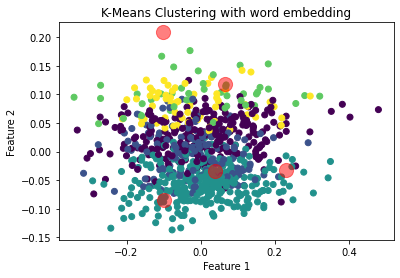

In [45]:

# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with word embedding')
plt.show()

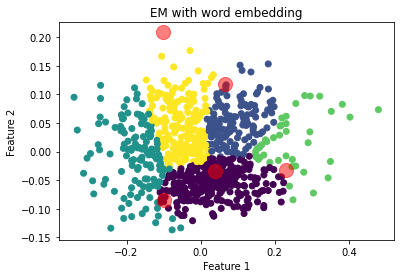

In [46]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Getting the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with word embedding')
plt.show()

#LDA 

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import pandas as pd

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Coherence K-means with LDA: 0.5878040064730262
Coherence GMM with LDA: 0.24760112542624796
Coherence Hierarchical with LDA: 0.524110076694233
______________________________________________________________________________________
Kappa K-means with LDA: -0.05875000000000008
Kappa GMM with LDA: -0.11749999999999994
Kappa Hierarchical with LDA : -0.06000000000000005
______________________________________________________________________________________
Silhouette K-means with LDA: 0.5878040064730262
Silhouette GMM with LDA: 0.24760112542624796
Silhouette Hierarchical with LDA: 0.524110076694233
______________________________________________________________________________________


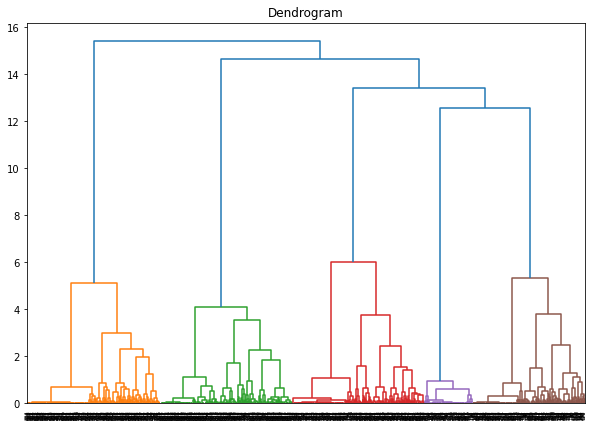

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


df = pd.read_csv('book_partitions.csv')

# Converting the text to bag of words
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow = vectorizer.fit_transform(df['Text'])

# Performing LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit_transform(bow)

# Transforming to topics
topics = lda.transform(bow)

# Runing K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(topics)
#kmeans.predict()
# Runing Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(topics)

# Runing Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(topics)
# Ploting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(topics, method='ward'))

# Calculating coherence
coherence_kmeans = silhouette_score(topics, kmeans.labels_)
coherence_gmm = silhouette_score(topics, gmm.predict(topics))
coherence_agg = silhouette_score(topics, agg.labels_)

# Calculating kappa
true_labels = df['Author'].astype('category').cat.codes
kappa_kmeans = cohen_kappa_score(true_labels, kmeans.labels_)
kappa_gmm = cohen_kappa_score(true_labels, gmm.predict(topics))
kappa_agg = cohen_kappa_score(true_labels, agg.labels_)

# Calculating silhouette
silhouette_kmeans = silhouette_score(topics, kmeans.labels_)
silhouette_gmm = silhouette_score(topics, gmm.predict(topics))
silhouette_agg = silhouette_score(topics, agg.labels_)

# Printing the results
print("Coherence K-means with LDA:", coherence_kmeans)
print("Coherence GMM with LDA:", coherence_gmm)
print("Coherence Hierarchical with LDA:", coherence_agg)
print("______________________________________________________________________________________")
print("Kappa K-means with LDA:", kappa_kmeans)
print("Kappa GMM with LDA:", kappa_gmm)
print("Kappa Hierarchical with LDA :", kappa_agg)
print("______________________________________________________________________________________")
print("Silhouette K-means with LDA:", silhouette_kmeans)
print("Silhouette GMM with LDA:", silhouette_gmm)
print("Silhouette Hierarchical with LDA:", silhouette_agg)
print("______________________________________________________________________________________")




/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



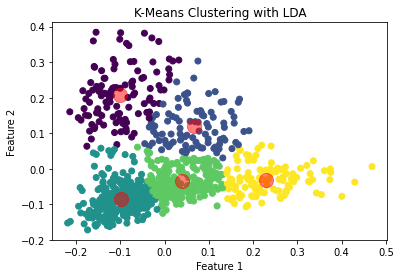

In [50]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Geting the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with LDA')
plt.show()

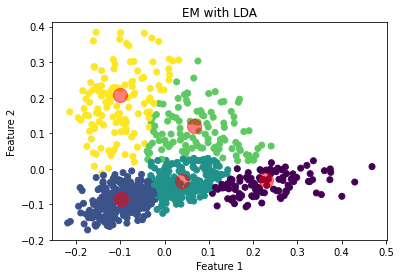

In [51]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Geting the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with LDA')
plt.show()

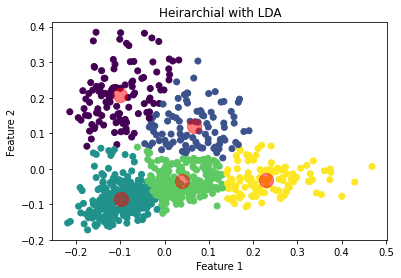

In [52]:
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Heirarchial with LDA")
plt.show()

====TEST DATA CLUSTER====


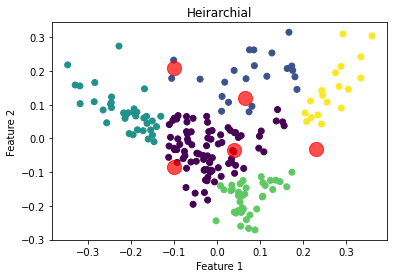

In [53]:
print("====TEST DATA CLUSTER====")
predicted_labels=agg.fit_predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heirarchial')
plt.show()

#ERROR ANALYSIS 

In [54]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


df = pd.read_csv('book_partitions.csv')

# Converting the text to bag of words
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow = vectorizer.fit_transform(df['Text'])

# Performing LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit_transform(bow)

# Transforming to topics
topics = lda.transform(bow)

# Runing K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(topics)
#kmeans.predict()
# Runing Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(topics)

# Runing Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(topics)



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



AgglomerativeClustering(n_clusters=5)

In [55]:
data['label']=0
data['label'][200:400]=1
data['label'][400:600]=2
data['label'][600:800]=3
data['label'][800:1000]=4

<ipython-input-55-f510ee5b3d00>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-f510ee5b3d00>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-f510ee5b3d00>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-f510ee5b3d00>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [56]:
df['actual_label']=data['label']
df['predicted_label']=kmeans.labels_

In [57]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions :",count)

The number of wrong predictions : 163


In [58]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:200]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for Moby Dick:",count)

The number of wrong predictions for Moby Dick: 38


In [59]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:400]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for The Parent's Assistant:",count)

The number of wrong predictions for The Parent's Assistant: 50


In [60]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:600]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for The Man Who Was Thursday:",count)

The number of wrong predictions for The Man Who Was Thursday: 144


In [61]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:800]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for the book EMMA :",count)

The number of wrong predictions for the book EMMA : 162


In [62]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:1000]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for the book The Tragedy of Hamlet :",count)

The number of wrong predictions for the book The Tragedy of Hamlet : 163



 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : Moby Dick



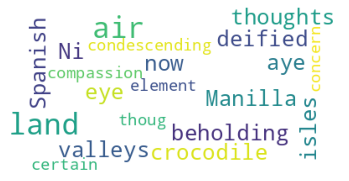


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : The Parent's Assistant



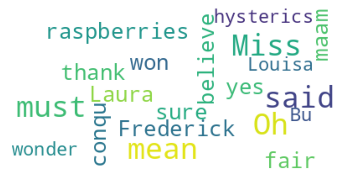


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : The Man Who Was Thursday



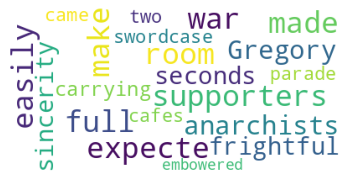


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : Emma



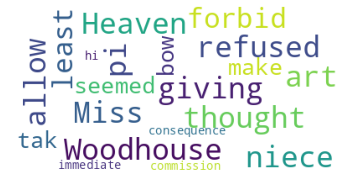


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : The Tragedie of Hamlet



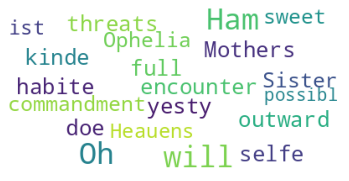

In [71]:
#plotting the words that threw our machine off 
import wordcloud

for label in data['Book Name'].unique():
  books = data[data["Book Name"]==label]["Text"]

  #wordcloud 
  print(f"\n WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=20, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

In [64]:
# %pip install mlxtend --upgrade
# %pip install pyLDAvis
import math
import pandas as pd 
import numpy as np
from numpy import concatenate
import re
from urllib import request
from pprint import pprint 

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import silhouette_score ,silhouette_samples
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.decomposition  import PCA
from sklearn.metrics import cohen_kappa_score
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.metrics.pairwise import euclidean_distances

import scipy.cluster.hierarchy as shc
from scipy.sparse import csr_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# nltk 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ginsim
import gensim
import gensim.corpora as corpora
import gensim.utils as simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec
import gensim.downloader as api
import spacy
import scipy

# Plotting tools

# import pyLDAvis.gensim_models as genisvis
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3 The average silhouette_score is : 0.38855128719246573 



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4 The average silhouette_score is : 0.4973949982331551 



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5 The average silhouette_score is : 0.5878040064730262 



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6 The average silhouette_score is : 0.5617311446499984 



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7 The average silhouette_score is : 0.5606009013910457 



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8 The average silhouette_score is : 0.5546492736210998 



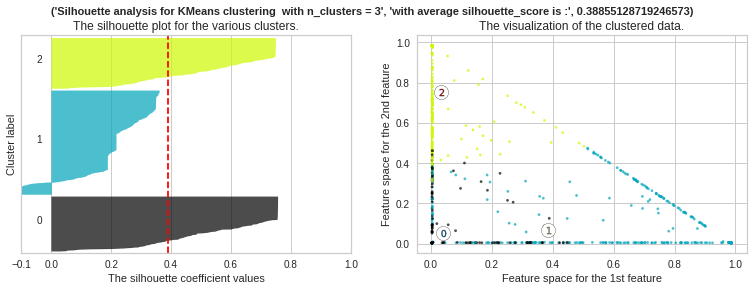

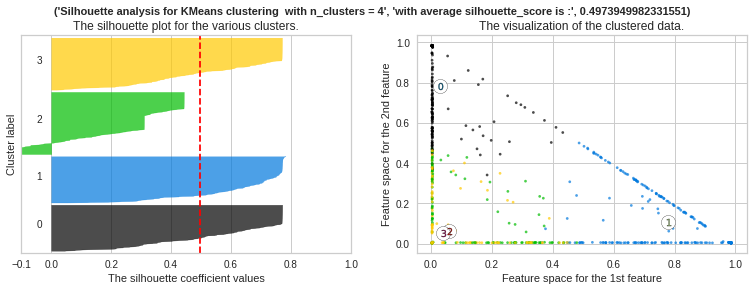

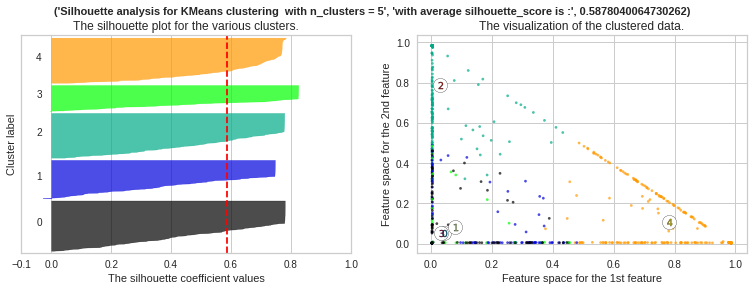

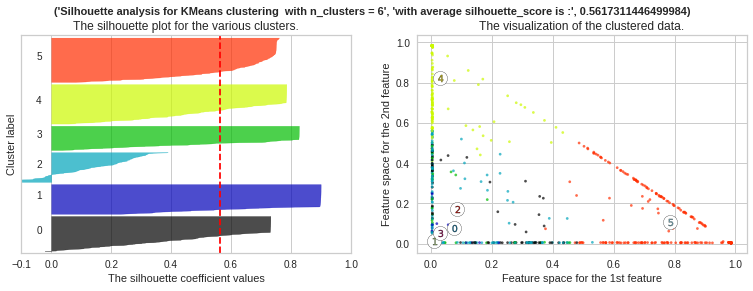

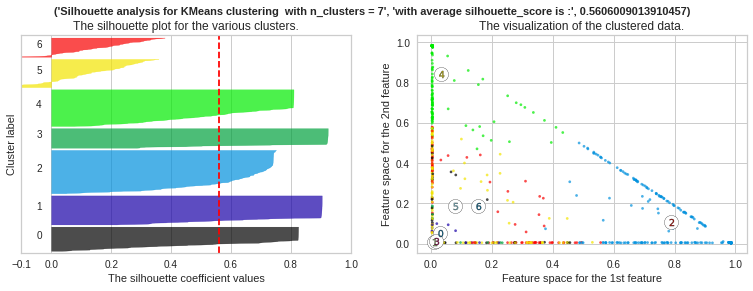

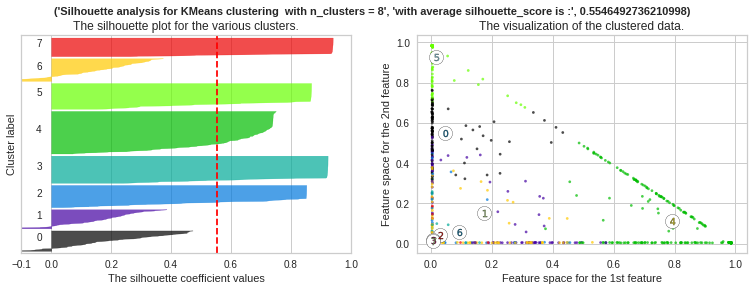

In [65]:
range_n_clusters = [ 3, 4, 5, 6,7,8]
sil_scores = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13, 4)
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(topics) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(topics)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(topics , cluster_labels)
    sil_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg ,"\n")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(topics, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(topics[:, 0], topics[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='${}$'.format(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering  "
                  "with n_clusters = %d" % n_clusters ,"with average silhouette_score is :", silhouette_avg ),
                 fontsize=11, fontweight='bold')

plt.show()

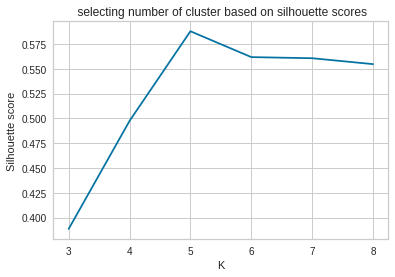

In [66]:
plt.plot(range_n_clusters , sil_scores )
plt.title(" selecting number of cluster based on silhouette scores")
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.show()